In [1]:
# DATA MANIPULATION
import pandas as pd
import numpy as np
import math

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_predict
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
#load data
df = pd.read_pickle(f'../models/all_df.pickle')

#reset row index
df.reset_index(drop=True, inplace=True)
df

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,7417.148000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,5873.244001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,5919.879001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,6318.785010,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,2199.087000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83483,54,2017-08-11,8513.834000,166,El Carmen,Manabi,C,3,Transfer,National,Ecuador,48.81,48.81,768.0
83484,54,2017-08-12,9139.678002,138,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,903.0
83485,54,2017-08-13,14246.827996,173,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1054.0
83486,54,2017-08-14,11882.994000,126,El Carmen,Manabi,C,3,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,818.0


/Users/jingxuanzhu/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='sales'>

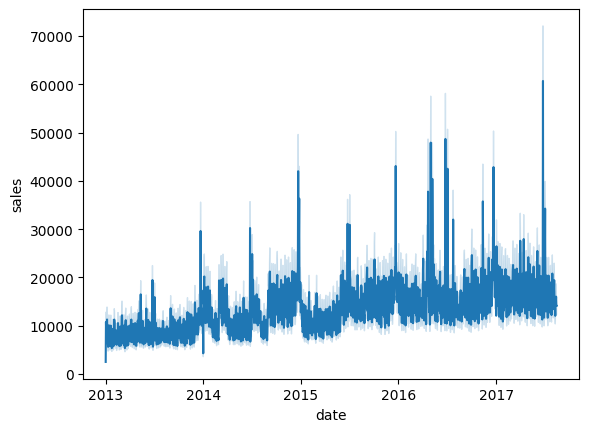

In [3]:
sns.lineplot(df['date'],df['sales'])

In [4]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):

    plt.figure(figsize=(10, 6))
    if type(y) is tuple:
      for y_curr in y:
        plt.plot(x[start:end], y_curr[start:end], format)
    else:
      plt.plot(x[start:end], y[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
      plt.legend(legend)

    plt.title(title)
    plt.grid(True)
    plt.show()

In [5]:
df_filtered = df[(df['store_nbr'] == 1)]
df_filtered

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,7417.148000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,5873.244001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,5919.879001,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,6318.785010,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,2199.087000,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1,2017-08-11,5403.742021,216,Quito,Pichincha,D,13,Transfer,National,Ecuador,48.81,48.81,570.0
1672,1,2017-08-12,7543.623000,103,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1004.0
1673,1,2017-08-13,3902.782000,73,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,416.0
1674,1,2017-08-14,10433.314000,120,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,1733.0


In [6]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Reshape the 'sales' column into a 2D array
sales_column = df_filtered['sales'].values.reshape(-1, 1)

# Apply the scaling transformation to the 'sales' column using .loc accessor
df_filtered.loc[:, 'sales'] = scaler.fit_transform(sales_column)

/var/folders/tw/rk2wwyp53tn3mf0hq9xsl_g40000gn/T/ipykernel_18584/2666695851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'sales'] = scaler.fit_transform(sales_column)


In [7]:
df_filtered

,store_nbr,date,sales,onpromotion,city,state,type_stores,cluster,type_holiday,locale,locale_name,oil_price,oil_price_interpolated,transactions
0,1,2013-01-02,0.198178,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.14,93.14,2111.0
1,1,2013-01-03,0.148971,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,92.97,92.97,1833.0
2,1,2013-01-04,0.150458,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,93.12,93.12,1863.0
3,1,2013-01-05,0.163171,0,Quito,Pichincha,D,13,Work Day,National,Ecuador,0.00,0.00,1509.0
4,1,2013-01-06,0.031870,0,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1,2017-08-11,0.134007,216,Quito,Pichincha,D,13,Transfer,National,Ecuador,48.81,48.81,570.0
1672,1,2017-08-12,0.202209,103,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,1004.0
1673,1,2017-08-13,0.086170,73,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,0.00,0.00,416.0
1674,1,2017-08-14,0.294308,120,Quito,Pichincha,D,13,Not Holiday,Not Holiday,Not Holiday,47.59,47.59,1733.0


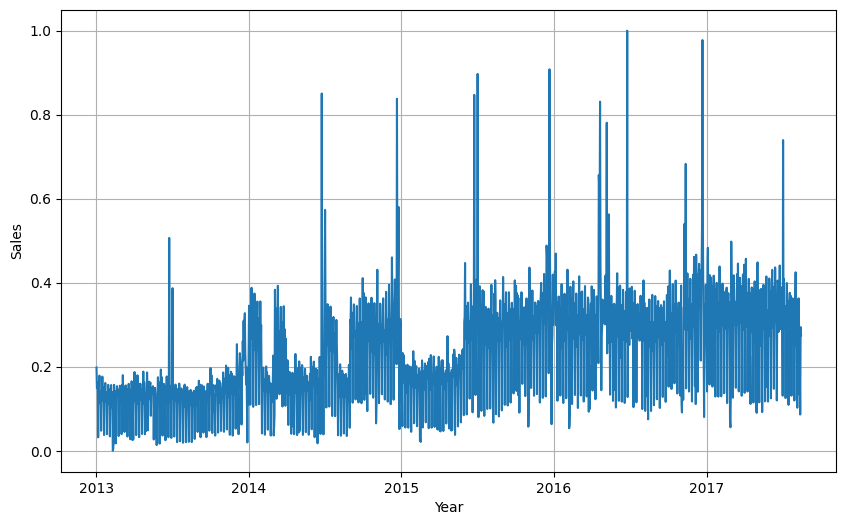

In [8]:
# Convert lists to numpy arrays
time_step = df_filtered['date']
series = df_filtered['sales']
time = np.array(time_step)
series = np.array(series)

# Preview the data
plot_series(time, series, xlabel='Year', ylabel='Sales')

In [9]:
# Define the split time
split_time = 1400

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [11]:
# Parameters
window_size = 300
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

## 1. use DNN RNN CNN

In [12]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 300, 64)           256       
                                                                 
 lstm (LSTM)                 (None, 300, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 lambda (Lambda)             (None, 1)                 0

In [13]:
# Get initial weights
init_weights = model.get_weights()

In [14]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=70, callbacks=[lr_schedule])

Epoch 1/70


2023-04-19 16:30:32.740297: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


35/35 [==============================] - 8s 156ms/step - loss: 0.4900 - lr: 1.0000e-08
Epoch 2/70
35/35 [==============================] - 5s 147ms/step - loss: 0.1210 - lr: 1.1220e-08
Epoch 3/70
35/35 [==============================] - 5s 147ms/step - loss: 0.0602 - lr: 1.2589e-08
Epoch 4/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0583 - lr: 1.4125e-08
Epoch 5/70
35/35 [==============================] - 5s 149ms/step - loss: 0.0581 - lr: 1.5849e-08
Epoch 6/70
35/35 [==============================] - 5s 147ms/step - loss: 0.0578 - lr: 1.7783e-08
Epoch 7/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0575 - lr: 1.9953e-08
Epoch 8/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0573 - lr: 2.2387e-08
Epoch 9/70
35/35 [==============================] - 5s 147ms/step - loss: 0.0570 - lr: 2.5119e-08
Epoch 10/70
35/35 [==============================] - 5s 149ms/step - loss: 0.0567 - lr: 2.8184e-08
Epoch 11/70
35/35 [===========

In [15]:
history

(1e-08, 0.001, 0.0, 2.0)

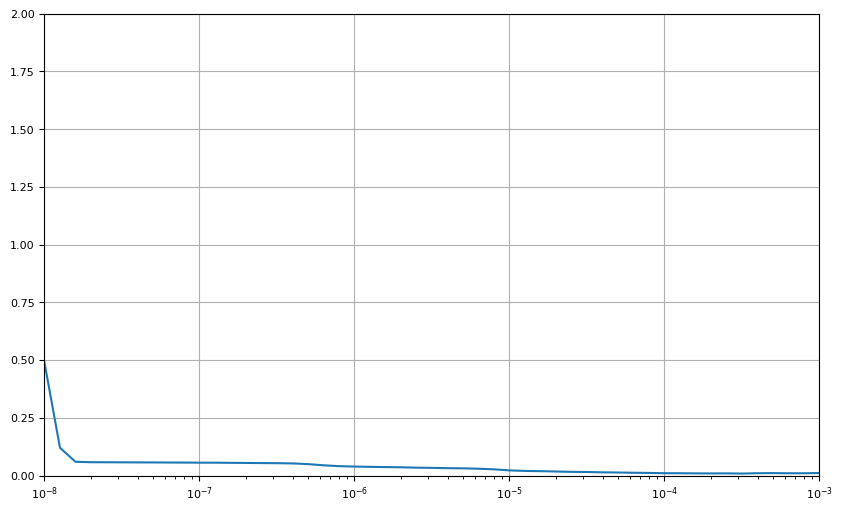

In [16]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(70) / 10))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
#plt.tick_params('both', length=100, width=1, which='both')

plt.tick_params(axis='both', which='both', labelsize=8)  # Updated tick label size

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 2])

In [17]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [18]:
# Set the learning rate
learning_rate = 1e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [19]:
# Train the model
history = model.fit(train_set,epochs=70)

Epoch 1/70
35/35 [==============================] - 7s 147ms/step - loss: 0.1890 - mae: 0.4892
Epoch 2/70
35/35 [==============================] - 5s 147ms/step - loss: 0.0602 - mae: 0.2887
Epoch 3/70
35/35 [==============================] - 5s 146ms/step - loss: 0.0565 - mae: 0.2798
Epoch 4/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0553 - mae: 0.2763
Epoch 5/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0541 - mae: 0.2719
Epoch 6/70
35/35 [==============================] - 5s 149ms/step - loss: 0.0511 - mae: 0.2641
Epoch 7/70
35/35 [==============================] - 5s 148ms/step - loss: 0.0444 - mae: 0.2450
Epoch 8/70
35/35 [==============================] - 5s 149ms/step - loss: 0.0401 - mae: 0.2319
Epoch 9/70
35/35 [==============================] - 5s 149ms/step - loss: 0.0387 - mae: 0.2278
Epoch 10/70
35/35 [==============================] - 5s 150ms/step - loss: 0.0376 - mae: 0.2252
Epoch 11/70
35/35 [==============================

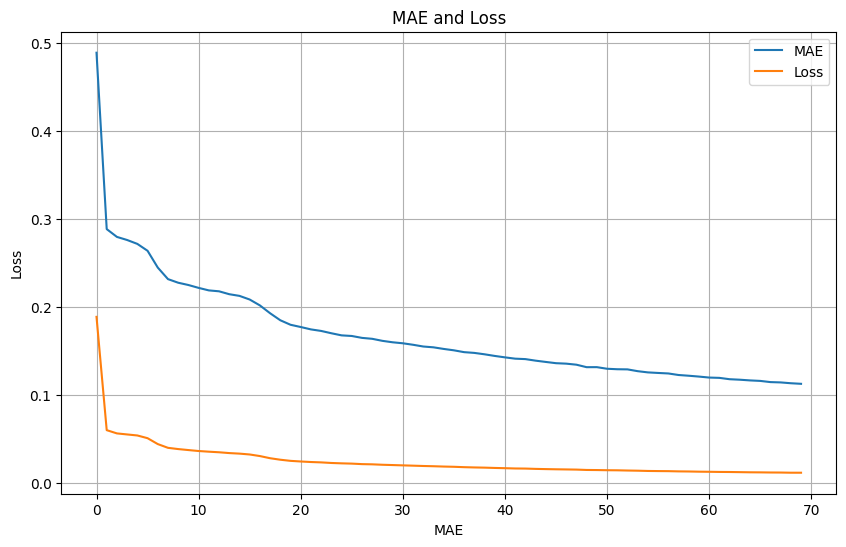

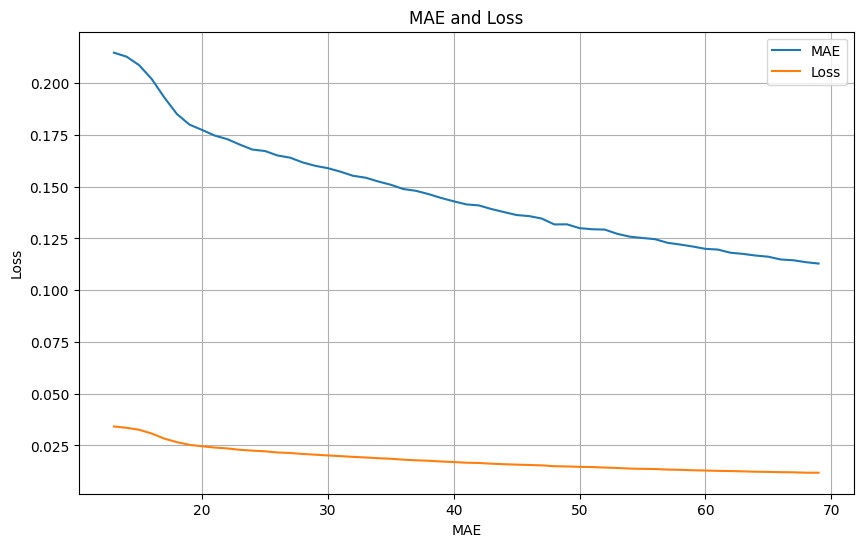

In [20]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, loss), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom, 
    y=(mae_zoom, loss_zoom), 
    title='MAE and Loss', 
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [21]:
def model_forecast(model, series, window_size, batch_size):

    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    dataset = dataset.batch(batch_size).prefetch(1)
    forecast = model.predict(dataset)
    
    return forecast

9/9 [==============================] - 1s 37ms/step


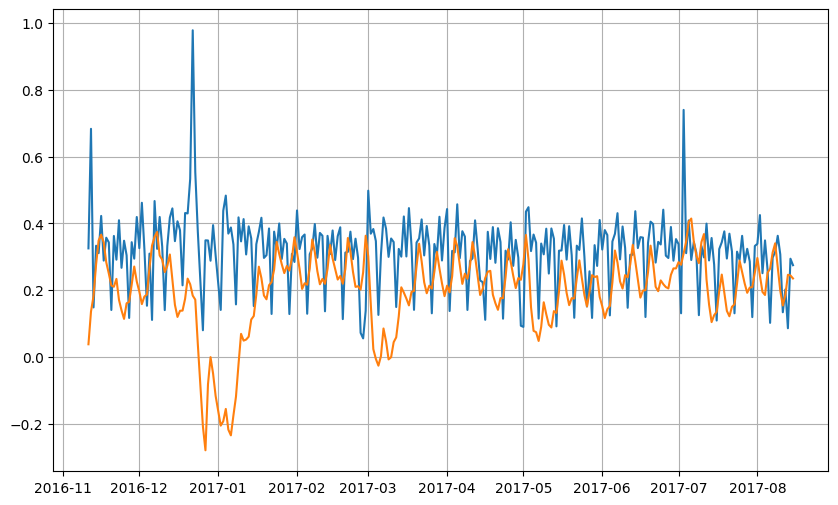

In [22]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

forecast = model_forecast(model, forecast_series, window_size, batch_size)

results = forecast.squeeze()

plot_series(time_valid, (x_valid, results))

In [23]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.03747804
0.14714913


## 2. use LSTM

In [24]:
# Build the Model
model_tune_LSTM = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 300, 1)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 300, 64)          8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [25]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune_LSTM.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune_LSTM.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
35/35 [==============================] - 6s 87ms/step - loss: 4.7586 - lr: 1.0000e-08
Epoch 2/100
35/35 [==============================] - 3s 87ms/step - loss: 4.5884 - lr: 1.1220e-08
Epoch 3/100
35/35 [==============================] - 3s 87ms/step - loss: 4.3852 - lr: 1.2589e-08
Epoch 4/100
35/35 [==============================] - 3s 92ms/step - loss: 4.1570 - lr: 1.4125e-08
Epoch 5/100
35/35 [==============================] - 3s 89ms/step - loss: 3.9011 - lr: 1.5849e-08
Epoch 6/100
35/35 [==============================] - 3s 91ms/step - loss: 3.6140 - lr: 1.7783e-08
Epoch 7/100
35/35 [==============================] - 3s 91ms/step - loss: 3.2921 - lr: 1.9953e-08
Epoch 8/100
35/35 [==============================] - 3s 92ms/step - loss: 2.9312 - lr: 2.2387e-08
Epoch 9/100
35/35 [==============================] - 3s 91ms/step - loss: 2.5305 - lr: 2.5119e-08
Epoch 10/100
35/35 [==============================] - 4s 94ms/step - loss: 2.1116 - lr: 2.8184e-08
Epoch 11/100
35/35 

(1e-08, 0.001, 0.0, 2.0)

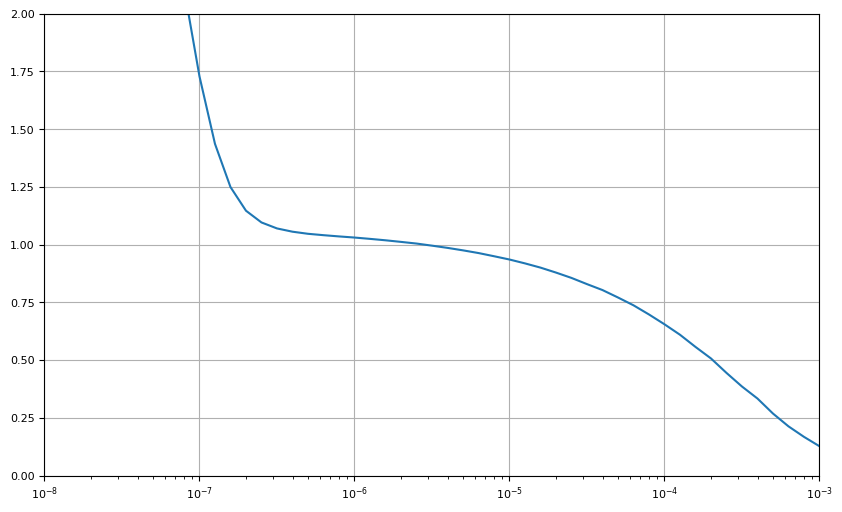

In [26]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 10))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
#plt.tick_params('both', length=100, width=1, which='both')

plt.tick_params(axis='both', which='both', labelsize=8)  # Updated tick label size

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 2])

In [27]:
# train model

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model_LSTM = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-7

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_LSTM.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model_LSTM.fit(train_set,epochs=100)

Epoch 1/100
35/35 [==============================] - 7s 95ms/step - loss: 1.1636 - mae: 1.6079
Epoch 2/100
35/35 [==============================] - 4s 97ms/step - loss: 0.3427 - mae: 0.7599
Epoch 3/100
35/35 [==============================] - 4s 96ms/step - loss: 0.3261 - mae: 0.7409
Epoch 4/100
35/35 [==============================] - 4s 97ms/step - loss: 0.3204 - mae: 0.7323
Epoch 5/100
35/35 [==============================] - 4s 97ms/step - loss: 0.3138 - mae: 0.7223
Epoch 6/100
35/35 [==============================] - 4s 97ms/step - loss: 0.3079 - mae: 0.7185
Epoch 7/100
35/35 [==============================] - 4s 97ms/step - loss: 0.3017 - mae: 0.7081
Epoch 8/100
35/35 [==============================] - 4s 97ms/step - loss: 0.2960 - mae: 0.7014
Epoch 9/100
35/35 [==============================] - 4s 98ms/step - loss: 0.2903 - mae: 0.6930
Epoch 10/100
35/35 [==============================] - 4s 97ms/step - loss: 0.2850 - mae: 0.6884
Epoch 11/100
35/35 [=============================

9/9 [==============================] - 1s 24ms/step


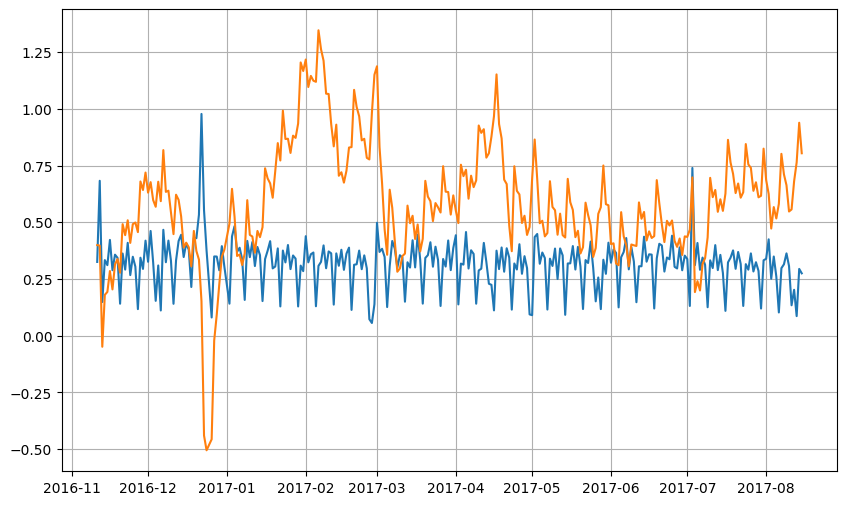

In [28]:
# forcast

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_LSTM, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [29]:

# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.15301122
0.3152403


## 3. use RNN

In [30]:
# Build the Model
model_tune_RNN = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 300, 1)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 300, 40)           1680      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
 lambda_3 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune_RNN.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune_RNN.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
35/35 [==============================] - 2s 35ms/step - loss: 22.7895 - lr: 1.0000e-08
Epoch 2/100
35/35 [==============================] - 1s 34ms/step - loss: 21.0409 - lr: 1.1220e-08
Epoch 3/100
35/35 [==============================] - 1s 34ms/step - loss: 19.3933 - lr: 1.2589e-08
Epoch 4/100
35/35 [==============================] - 1s 35ms/step - loss: 18.1732 - lr: 1.4125e-08
Epoch 5/100
35/35 [==============================] - 1s 34ms/step - loss: 17.5050 - lr: 1.5849e-08
Epoch 6/100
35/35 [==============================] - 1s 35ms/step - loss: 17.1389 - lr: 1.7783e-08
Epoch 7/100
35/35 [==============================] - 1s 35ms/step - loss: 16.8282 - lr: 1.9953e-08
Epoch 8/100
35/35 [==============================] - 1s 35ms/step - loss: 16.5154 - lr: 2.2387e-08
Epoch 9/100
35/35 [==============================] - 1s 35ms/step - loss: 16.1855 - lr: 2.5119e-08
Epoch 10/100
35/35 [==============================] - 1s 35ms/step - loss: 15.8169 - lr: 2.8184e-08
Epoch 11/

(1e-08, 0.001, 0.0, 50.0)

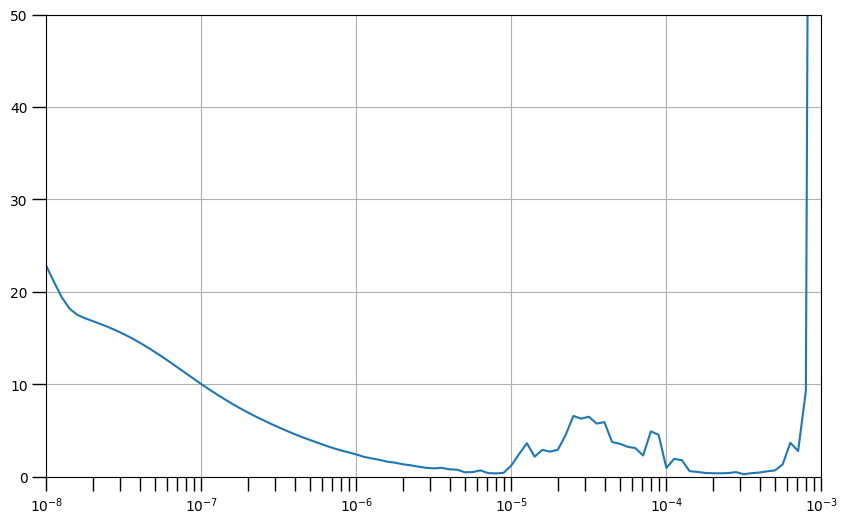

In [32]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

In [33]:

# Build the model
model_RNN = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


# Print the model summary
model_RNN.summary()

# Set the learning rate
learning_rate = 5e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_RNN.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model_RNN.fit(train_set,epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 300, 1)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 300, 40)           1680      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
 lambda_5 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
35/35 [==============================] -

1/1 [==============================] - 0s 14ms/step


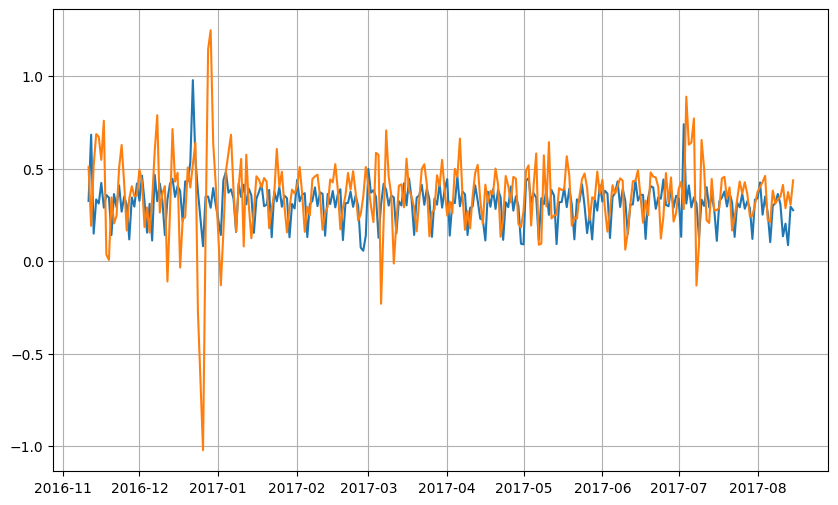

In [34]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_RNN.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [35]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.045385886
0.15499255


## 4. use LSTM-CNN

In [36]:
model_LSTM_CNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[window_size, 1]),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])


In [37]:
# # Set the learning rate
# learning_rate = 8e-4

# # Set the optimizer 
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model_LSTM_CNN.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=["mae"])

# Train the model
history = model_LSTM_CNN.fit(train_set,epochs=100)

Epoch 1/100
35/35 [==============================] - 4s 56ms/step - loss: 0.0081 - mae: 0.0904
Epoch 2/100
35/35 [==============================] - 2s 57ms/step - loss: 0.0053 - mae: 0.0709
Epoch 3/100
35/35 [==============================] - 2s 57ms/step - loss: 0.0054 - mae: 0.0714
Epoch 4/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0699
Epoch 5/100
35/35 [==============================] - 2s 57ms/step - loss: 0.0052 - mae: 0.0699
Epoch 6/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0696
Epoch 7/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0054 - mae: 0.0714
Epoch 8/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0052 - mae: 0.0702
Epoch 9/100
35/35 [==============================] - 2s 59ms/step - loss: 0.0052 - mae: 0.0688
Epoch 10/100
35/35 [==============================] - 2s 58ms/step - loss: 0.0051 - mae: 0.0688
Epoch 11/100
35/35 [=============================

1/1 [==============================] - 0s 14ms/step


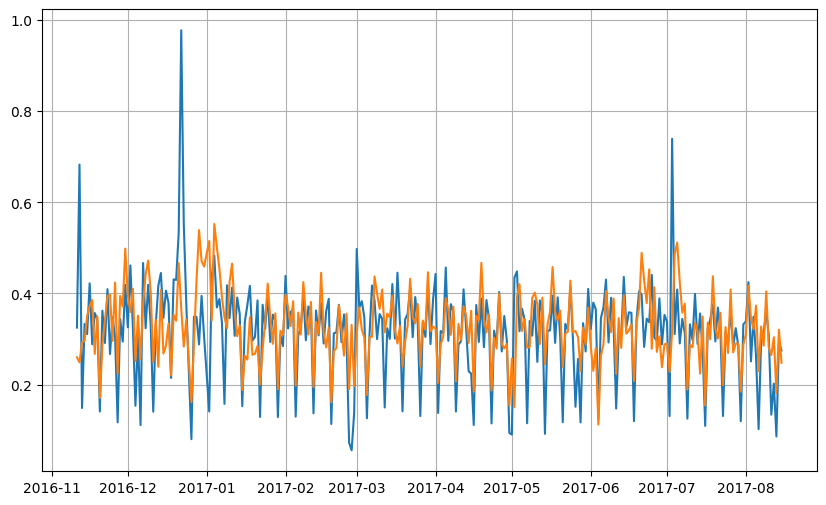

In [38]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_LSTM_CNN.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [39]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

0.009526452
0.06957174
